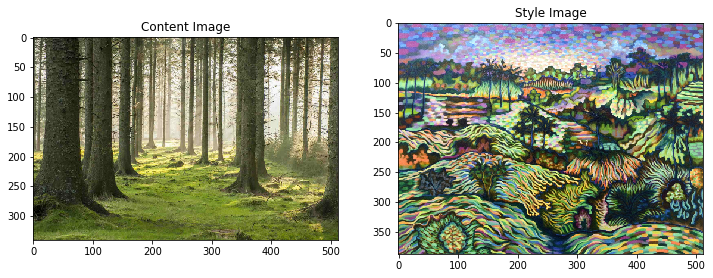

In [1]:
from __future__ import absolute_import, division, print_function, unicode_literals

import tensorflow as tf

import matplotlib.pyplot as plt
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = (12,12)
mpl.rcParams['axes.grid'] = False

from util import imshow, load_img, save_img, apply_lum, match_lum
from transfer import transfer_style

# load input images
# https://images1.novica.net/pictures/10/p348189_2a.jpg, https://www.novica.com/p/impressionist-painting-in-delod-pangkung/348189/
style_path = tf.keras.utils.get_file('impressionist-bali.jpg','file:///home/jupyter/pictures/impressionist-bali.jpg')

# https://www.positive.news/wp-content/uploads/2019/03/feat-1800x0-c-center.jpg
content_path = tf.keras.utils.get_file('forest.jpg','file:///home/jupyter/pictures/forest.jpg')

content_img = load_img(content_path, max_dim=512)
style_img = load_img(style_path, max_dim=512)

plt.subplot(1, 2, 1)
imshow(content_img, 'Content Image')

plt.subplot(1, 2, 2)
imshow(style_img, 'Style Image')

plt.show()

W0717 05:43:36.972093 140318717564672 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


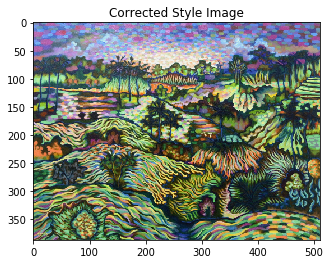

In [2]:
# Correct the style to match the luma of the content
style_img = match_lum(content_img, style_img)

imshow(style_img, 'Corrected Style Image')

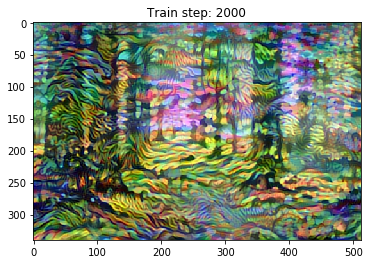

Total time: 68.1


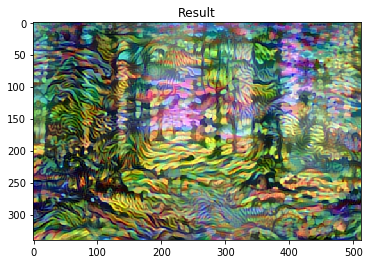

In [4]:
# Run the style transfer
style_weights = [ 1e3/n**2 for n in [64, 128, 256, 512, 512] ]
style_weights = [w/sum(style_weights) for w in style_weights]

transferred = transfer_style(content_img, style_img, alpha=1e1, beta=1e-2, total_variation_weight=1e8, style_weights = [1.0, 1.0, 1.0, 1.0, 1.0], epochs=20)
imshow(transferred, 'Result')
save_img(transferred[0], 'output.png')

W0717 05:46:11.204787 140318717564672 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
W0717 05:46:11.211729 140318717564672 image.py:648] Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


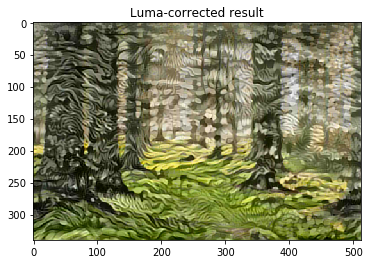

In [5]:
# Apply the original image luma
luma_transferred = apply_lum(content_img, transferred)
imshow(luma_transferred, 'Luma-corrected result')
save_img(luma_transferred[0], 'output-luma.png')